In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/mnist_test.csv')

In [ ]:
df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(10000, 785)

In [ ]:
# To find null if any null value exist
df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
# to find data type of each attribute.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mean_excluding_first = df.drop('label', axis=1).mean()
max_mean = mean_excluding_first.max()
max_mean

142.9434

In [ ]:
data=df.drop('label',axis=1)

In [ ]:
data1=data.values

In [ ]:
#define the function for cosine similarity.

def Cosine_Similarity(x, means):
    # Calculate the dot product between x and mu_k
    dot_products = np.dot(x, means.T)

    # Calculate the norms of x and mu_k
    x_norm = np.linalg.norm(x)
    means_norm = np.linalg.norm(means, axis=1)

    # formula for cosine similarity.
    distances = 1 - dot_products / (x_norm * means_norm)
    return distances
# at the end of this function I will get the distance.

In [ ]:
max_iterations=10000
tolerance=1e-4
def k_means(data, k):
    # Step 1: Initialize mu_k randomly
    mu = max_mean*np.random.rand(k, data.shape[1])

    t = 0
    while t < max_iterations:
        # Step 2: Using cosine symmetry as distance.
        distances = Cosine_Similarity(data, mu)
        labels = np.argmin(distances, axis=1)

        # Step 3: Updating mu
        new_mu = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence by usng tolerance=1e-4
        if np.all(np.abs(mu - new_mu) < tolerance):
            break

        mu = new_mu
        t += 1

    return labels, mu


In [ ]:
k = 10  # Number of clusters
label_10, mu = k_means(data1, k)

print(label_10)

[5 3 9 ... 8 8 1]


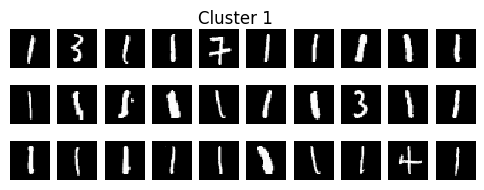

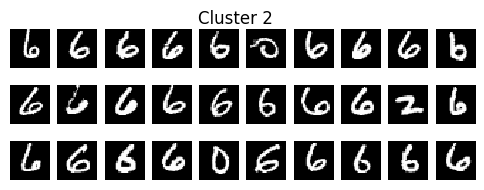

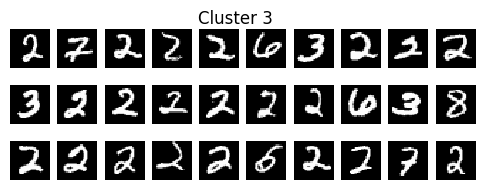

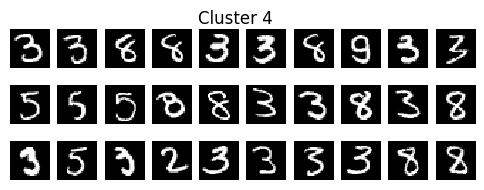

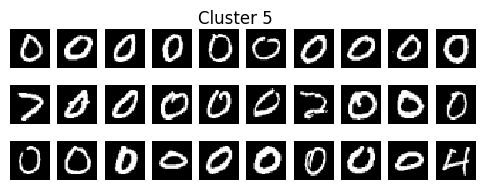

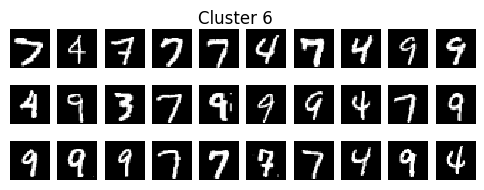

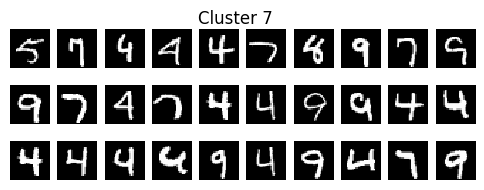

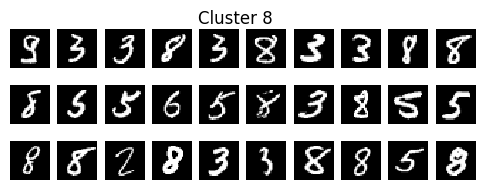

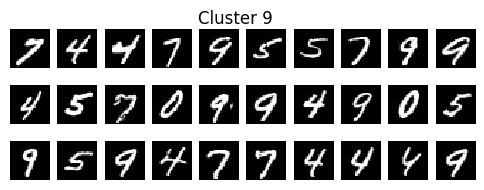

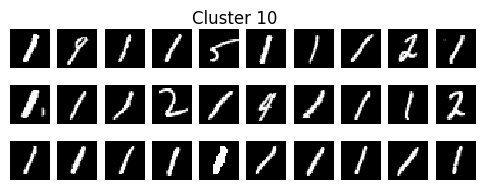

In [ ]:
for j in range(30):
  cluster_indices = np.where(label_10 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data1[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

In [ ]:
k = 7  # Number of clusters
label_7, mu = k_means(data1, k)

print(label_7)

[6 1 2 ... 6 6 4]


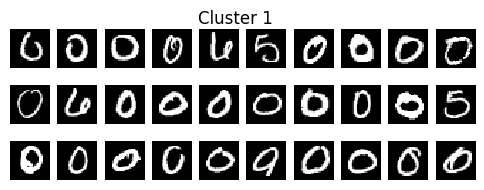

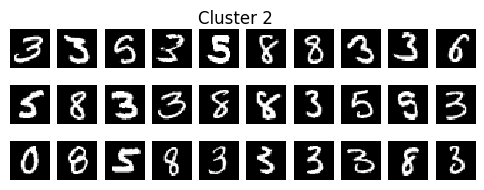

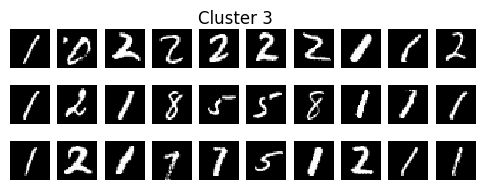

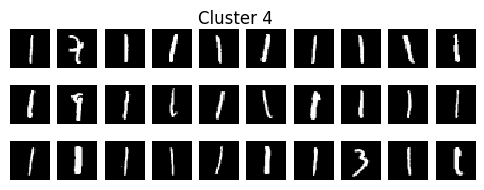

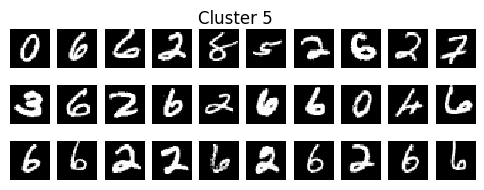

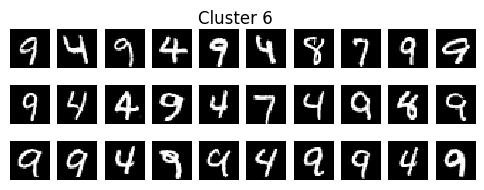

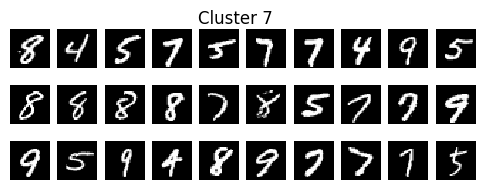

In [ ]:
for j in range(30):
  cluster_indices = np.where(label_7 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data1[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

In [ ]:
k = 4  # Number of clusters
label_4, mu = k_means(data1, k)

print(label_4)

[1 3 0 ... 1 0 2]


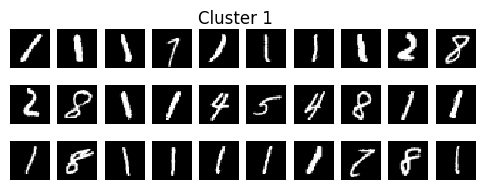

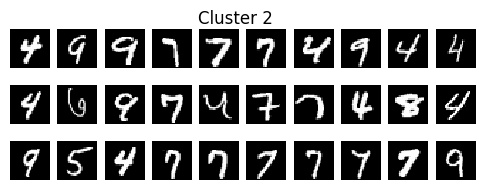

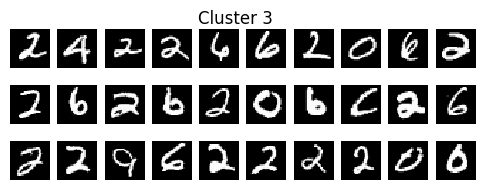

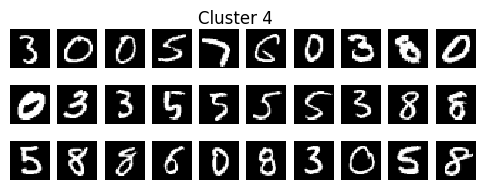

In [ ]:
for j in range(30):
  cluster_indices = np.where(label_4 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data1[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()
